<a href="https://colab.research.google.com/github/Erasnilson/analise-fraude-reg-logistica/blob/main/An%C3%A1lise_Fraude_RegLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Detecção de Fraude em Cartão de Crédito

A análise de regressão logística é uma técnica estatística utilizada para modelar a probabilidade de um determinado evento ocorrer. Ao contrário da regressão linear, que é usada para prever valores contínuos, a regressão logística é adequada para prever variáveis dependentes categóricas, especialmente binárias (como "sim" ou "não", "fraude" ou "não fraude").

\begin{equation}
\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
\end{equation}

A probabilidade prevista de um evento ocorrer é dada pela função logística:

\begin{equation}
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_n X_n)}}
\end{equation}

A regressão logística é utilizada em diversas áreas. No marketing é empregada para encontrar a probabilidade de um cliente comprar um produto, em finanças, para prever a probabilidade de fraude em transações.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [7]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 80% 53.0M/66.0M [00:00<00:00, 144MB/s]
100% 66.0M/66.0M [00:00<00:00, 139MB/s]


In [8]:
import zipfile

# Define the path to your zip file
file_path = '/content/creditcardfraud.zip'  # Replace 'your_file.zip' with your file's name


In [9]:
# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Replace 'destination_folder' with your desired folder

In [10]:
df = pd.read_csv('/content/creditcard.csv')
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Síntes dos dados



In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## A variável 'class' denota o presença e ausência de fraude no banco de dados. A partir na estimatíva média, nota-se que a proporção de fraude no conjunto de dados é inferior a 1%.


In [13]:
# A variável class denota o presença e ausência de fraude
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## Modelagem de Classificação
Amostragem do conjunto de dados em:
- 70% Treino
- 30% Teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names) # Coveriáveis X
print(target) # Va Resposta Y

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [16]:
data_features = df[feature_names]
data_target = df[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)
#class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


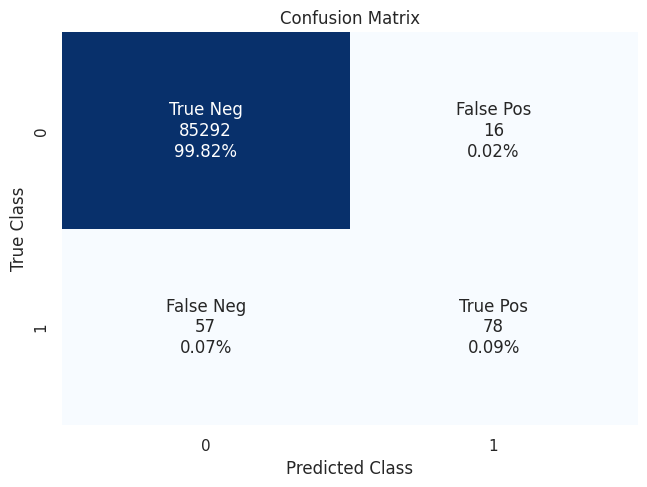

In [20]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(matrix,cbar=None, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


## Acurácia

A Acurácia é uma métrica que indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões

\begin{equation}
\text{Acurácia} = \frac{\text{Número de Previsões Corretas}}{\text{Número Total de Previsões}}
\end{equation}



## Sensibilidade

 A sensibilidade do modelo, também conhecida como taxa de verdadeiro positivo (True Positive Rate), é uma métrica utilizada em modelos de classificação para avaliar o desempenho do modelo. Esta métrica indica a capacidade do modelo de identificar corretamente as ocorrências de uma classe positiva (por exemplo, casos de uma doença, fraudes, etc.).

\begin{equation}
\text{Sensibilidade} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Negativos (FN)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Negativos (FN): Casos onde o modelo previu incorretamente a classe negativa, ou seja, deixou de identificar uma ocorrência positiva.





## Precisão

A precisão do modelo é particularmente importante em aplicações onde os falsos positivos têm um custo elevado, como na detecção de fraudes, diagnósticos médicos ou filtros de spam. No entanto, aumentar a precisão pode diminuir a sensibilidade e vice-versa.

\begin{equation}
\text{Precisão} = \frac{\text{Verdadeiros Positivos (TP)}}{\text{Verdadeiros Positivos (TP)} + \text{Falsos Positivos (FP)}}
\end{equation}

- Verdadeiros Positivos (TP): Casos onde o modelo previu corretamente a classe positiva.

- Falsos Positivos (FP): Casos onde o modelo previu a classe positiva incorretamente (ou seja, a previsão foi positiva, mas a instância era realmente negativa).

## F1 Score

O F1 Score é a média harmônica entre a precisão e a sensibilidade, é utilizada onde há um desequilíbrio de classes, ou seja, quando uma classe é muito mais frequente do que outra. Assim,  **para valores próximo a 1**, tem-se o melhor desempenho possível.

\begin{equation}
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Sensibilidade}}{\text{Precisão} + \text{Sensibilidade}}
\end{equation}



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_logist = round(accuracy_score(y_test, pred),4)
precision_score_log = round(precision_score(y_test, pred), 4)
recall_score_log = round(recall_score(y_test, pred), 4)
f1_score_log = round(f1_score(y_test, pred), 4)

print("Accuracy for Logistic Regression Model : {accuracy_logist}".format(accuracy_logist = accuracy_logist))
print("Precision for Logistic Regression Model : {precision_score_log}".format(precision_score_log = precision_score_log))
print("Sensitivity/Recall for Logistic Regression Model : {recall_score_log}".format(recall_score_log = recall_score_log))
print("F1 Score for Logistic Regression Model : {f1_score_log}".format(f1_score_log = f1_score_log))



Accuracy for Logistic Regression Model : 0.9991
Precision for Logistic Regression Model : 0.8298
Sensitivity/Recall for Logistic Regression Model : 0.5778
F1 Score for Logistic Regression Model : 0.6812


## Avaliação pela curva ROC

Critérios de avaliação para o valor AUC:
- 0,5: O modelo não tem capacidade discriminativa; é equivalente a uma classificação aleatória.
- 1,0: O modelo tem capacidade discriminativa perfeita; consegue separar completamente as classes.

Nesse caso, com o valor de 0,92, pode-se afirmar que ao escolher aleatoriamente uma instância positiva e uma negativa, há uma probabilidade de 92% de que o modelo atribua uma pontuação mais alta à instância positiva do que à negativa.

In [22]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.92


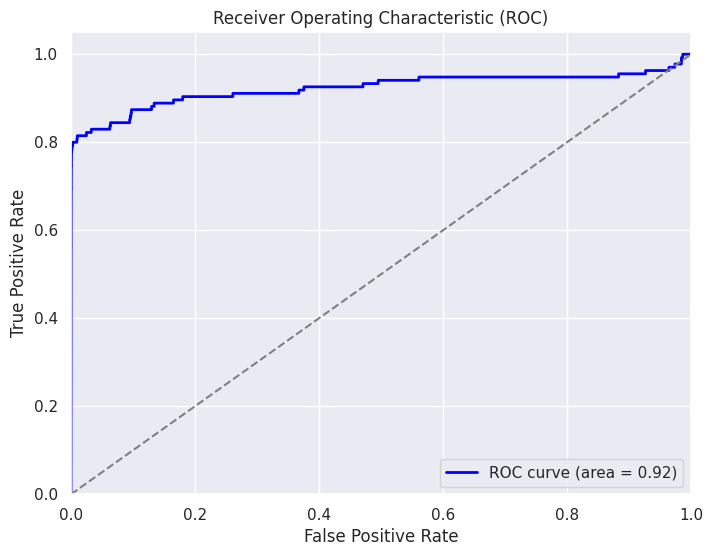

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Calcular a curva ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Ao considerar o modelo de Regressão Logística, o modelo foi capaz de identificar **corretamente 58% das ocorrências** positivas.
